# ECONOMETRIC ANALYSIS-TESTING UNIT ROOT WITH ADF

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import STL
from tabulate import tabulate
import scipy.stats
import pylab

In [2]:
data0=pd.read_excel('BPA.xlsx')

In [18]:
data = data0.copy()
data['Years']= pd.to_datetime(data['Years'], dayfirst=True)
data.set_index('Years', inplace=True)
data.asfreq('M')
data.index = data.index.to_period('M')
print('rows:',data.shape[0])
print('columns:',data.shape[1])
print(tabulate(data.head(), headers=['Years','CurAc','BOT','BOV','FIB','SIB']))

rows: 368
columns: 5
Years      CurAc    BOT    BOV    FIB    SIB
-------  -------  -----  -----  -----  -----
1992-01       94   -376    256   -110    324
1992-02      -80   -420    236   -251    355
1992-03     -174   -469    267   -271    299
1992-04     -235   -663    381   -238    285
1992-05      -35   -490    418   -172    209


In [4]:
data.isna().sum()

CurAc    0
BOT      0
BOV      0
FIB      0
SIB      0
dtype: int64

### Definition of Data

     ***Data was downloaded from Turkish Central Bank.
     ***Data is represent to current account of Turkiye for 1992-2022 years.
     CurAc ---> Current Account.
     BOT   ---> Balance of Trade.
     BOV   ---> Balance of Invisible.
     FIB   ---> First Income Balance.
     SIB   ---> Second Income Balance.

In [5]:
data.describe()

,CurAc,BOT,BOV,FIB,SIB
count,368.000000,368.000000,368.000000,368.000000,368.000000
mean,-1745.529891,-2840.975543,1449.331522,-547.095109,193.209239
std,2188.156657,2289.742351,1227.877491,321.389989,145.541317
min,-9407.000000,-9700.000000,-255.000000,-2055.000000,-266.000000
25%,-3187.250000,-4362.000000,559.750000,-689.750000,97.500000
50%,-1131.500000,-2270.000000,1025.000000,-471.500000,166.000000
75%,-116.000000,-946.500000,1946.000000,-303.750000,299.000000
max,3768.000000,1117.000000,7236.000000,-52.000000,738.000000


### Graphical Analysis

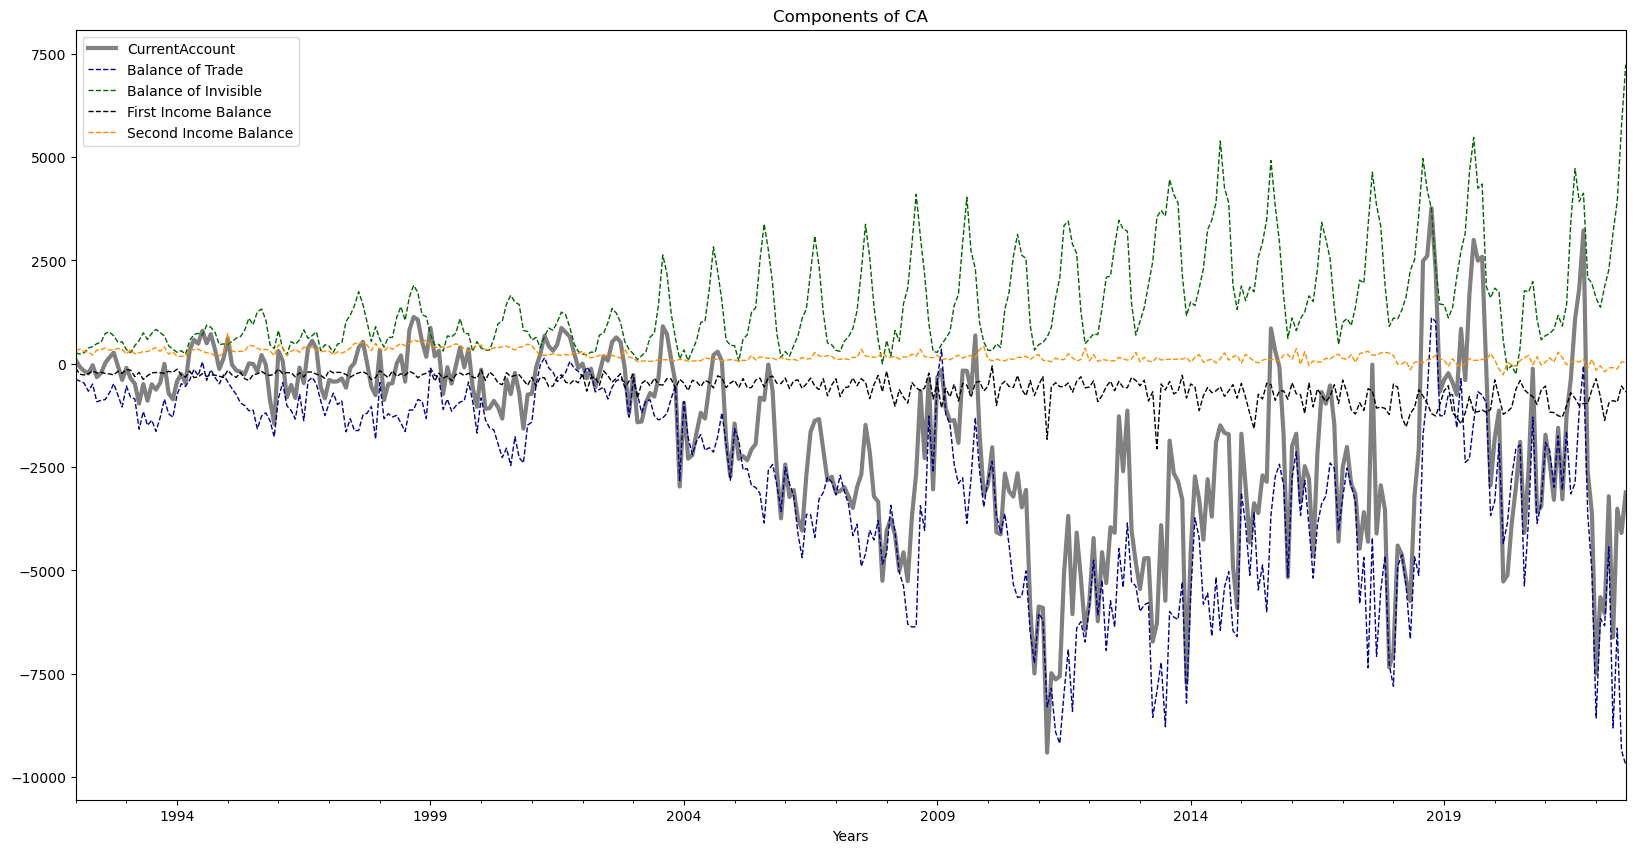

In [6]:
fig, ax=plt.subplots(figsize=(20,10))
data.CurAc.plot(linewidth=3, color='gray')
data.BOT.plot(linewidth=1,ls='--', color='darkblue')
data.BOV.plot(linewidth=1,ls='--', color='darkgreen')
data.FIB.plot(linewidth=1,ls='--', color='black')
data.SIB.plot(linewidth=1,ls='--', color='darkorange')
plt.legend(labels=['CurrentAccount','Balance of Trade', 'Balance of Invisible','First Income Balance', 'Second Income Balance'])
plt.title('Components of CA')
plt.show()

    According to graphic we can say that the basic dynamics of current account are trade balance and services balance. The trade movements have almost same movements with current account. But the invisibles have seasonal movements because of that Türkiye is a area which have popular summer tourism.
    From the point of view of econometric analysis it can be said that the current account is tend to turn its mean. The sub accounts of current account have same tendecy. It clearly is seen that the current account finds a path with movements of trade balance, with the contribution of seosanal impact of invisible it gains positive effect.
    After 1980's, Türkiye economy was transformed to open economy. With this integration process the trade balance increasingly continued to give negative balance. The impact of 2008 world economic crisis also effected Türkiye economy. As seen the graphic the movement of current account sharply turned to bottom. Because of that crisis, the trend of increase of money supply politics of central banks swept the whole world. These plenty money flowed to developing countries as well. The upward pattern of between 2009-10 and 2011-03 is largely result of that.

#### Analysis of Distribution

In [7]:
from sklearn import preprocessing
CurAc=np.asarray(data.CurAc).reshape(368,1)
scaler = preprocessing.StandardScaler().fit(CurAc)
X_scaled = scaler.transform(CurAc)

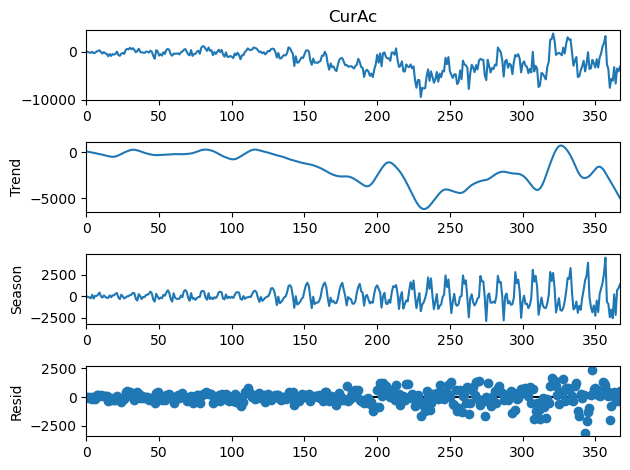

In [8]:
stl = STL(data0.CurAc, period=12)
result = stl.fit()
trend = result.trend
seasonal = result.seasonal
residual = result.resid
result.plot()
plt.show()

    With result of the decomposition process, we can clearly see that the series have deterministic trend and seasonal trend. While no serious deviations were observed in the serial movements until the mid-2000s, outlier movements began to be observed especially after 2009. In other words, the effects of shocks on the series increased their severity.

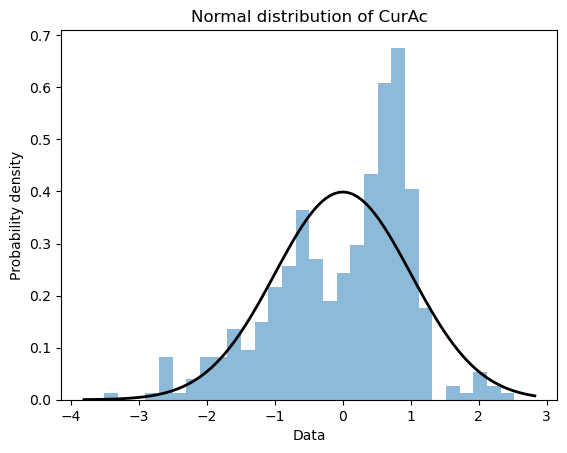

In [9]:
plt.hist(X_scaled, bins=30, density=True, alpha=0.5)
mu, std = np.mean(X_scaled), np.std(X_scaled)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-(x-mu)**2/(2*std**2))/(std*np.sqrt(2*np.pi))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Data')
plt.ylabel('Probability density')
plt.title('Normal distribution of CurAc')
plt.show()

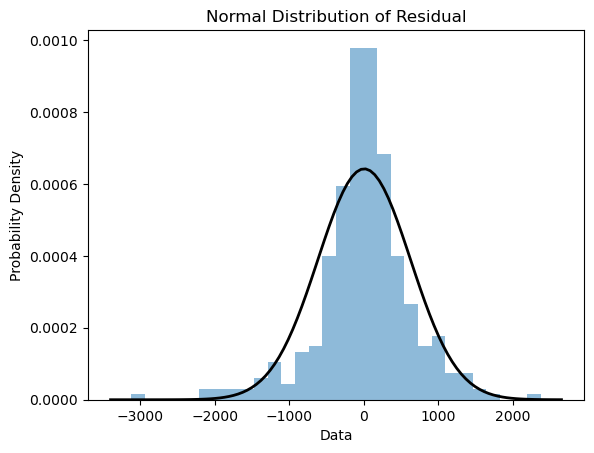

In [10]:
plt.hist(residual, bins=30, density=True, alpha=0.5)
mu, std = np.mean(residual), np.std(residual)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-(x-mu)**2/(2*std**2))/(std*np.sqrt(2*np.pi))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Data')
plt.ylabel('Probability Density')
plt.title('Normal Distribution of Residual')
plt.show()

    In theory, a data which distributed normally have same mean, mod and median. Residuals of current account show basic characteristic of normal distribution. To use the ordinary least squeares method at analysis, residuals of data which about the research have to fit normal distribution. This is one of condition of OLS.

### Autocorrelation(ACF-PACF)

  idx       ACF         PACF    Q-Stats    p-values
-----  --------  -----------  ---------  ----------
    0  1          1             242.025           0
    1  0.807678   0.809879      429.304           0
    2  0.709514   0.167068      571.583           0
    3  0.617577   0.0182747     675.897           0
    4  0.528078  -0.0282137     758.107           0
    5  0.468158   0.0390528     838.974           0
    6  0.463675   0.166761      896.596           0
    7  0.390862  -0.12723       953.259           0
    8  0.387059   0.116904     1010.53            0
    9  0.38858    0.0906785    1071.73            0
   10  0.401161   0.104512     1155.71            0
   11  0.469219   0.241587     1264.75            0
   12  0.533938   0.146596     1334.36            0
   13  0.426038  -0.398726     1380.88            0
   14  0.347783  -0.216022     1412.17            0
   15  0.28478    0.0324743    1431.48            0
   16  0.223473   0.0664474    1449.79            0
   17  0.217

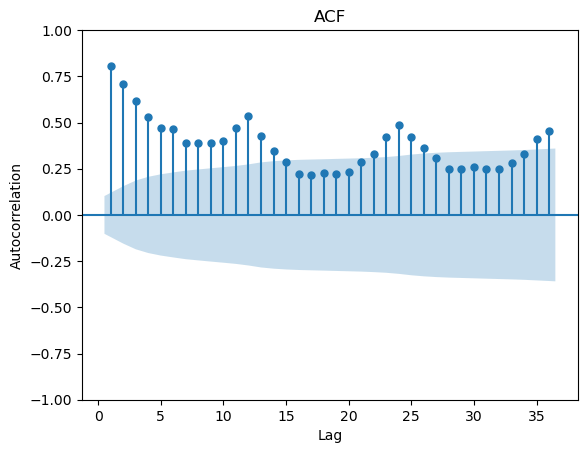

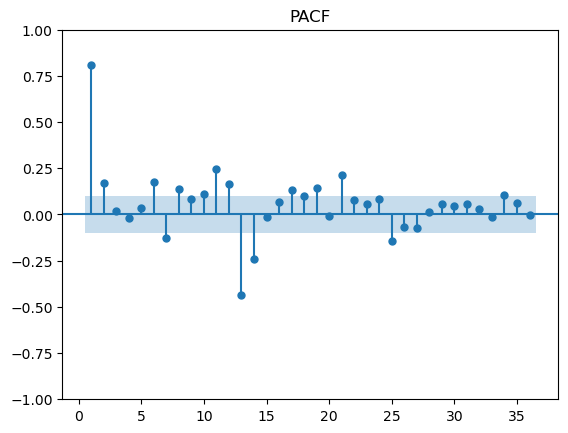

In [11]:
#ACF VALUES
acf_results = sm.tsa.acf(CurAc, nlags=36, alpha=0.05, qstat=True, missing='drop')
acf_coeffs = pd.DataFrame(acf_results[0])
acf_pvalues = pd.DataFrame(acf_results[3].round(5))
acf_qstat=pd.DataFrame(acf_results[2])
#PACF VALUES
pacf_results = sm.tsa.pacf(CurAc, nlags=36, alpha=0.05)
pacf_coeff=pd.DataFrame(pacf_results[0])
show_acf=tabulate(pd.concat([acf_coeffs,pacf_coeff,acf_qstat,acf_pvalues],axis=1),headers=['idx','ACF','PACF','Q-Stats','p-values'])
print(show_acf)
#ACF PLOT
fig, ax=plt.subplots()
sgt.plot_acf(CurAc, lags=36, zero=False,alpha=0.05, ax=ax)
ax.set_xlabel("Lag")
ax.set_ylabel("Autocorrelation")
plt.title('ACF')
plt.show()
#PACF PLOT
sgt.plot_pacf(CurAc, lags=36, zero=False, method=('ols'))
plt.title('PACF')
plt.show()

    Autocorrelation is a problem which is often seen in timeseries analysis. If consider on the serieS, have to reject the null hypothesis of autocorrelation test. That's mean that current account data have autocorrelation problem. With other words, there is relationship between residuals. Previus section, it was determined that the normal distribution condition was fullfiled. But in this section, one of the other conditions of OLS, that there is not relation between residuals is not met.

##### Autocorrelation Function

$\hat{\gamma}_{k}=\sum\limits\frac {(Y_{t}-\bar{Y})(Y_{t+k}-\bar{Y})}{n}$ <br>
$\hat{\gamma}_{0}=\sum\limits\frac {(Y_{t}-\bar{Y})^2}{n}$ <br>
$\hat{\rho}_{k}=\frac{\hat{\gamma}_{k}}{\hat{\gamma}_{0}}$

### Unit Root Test

At 1979, David Dickey and Wayne Fuller developed a test which testing whether a series stationary or not. According to this test a regression is defined as below.

$Y_{t}=\alpha_{0}+\alpha_{1}t+{\rho}Y_{t-1}+\epsilon$

But this definiton does not consider autocorrelation problem. Because of that we can't use it with current account data. In order to fix this problem, at 1981, Dickey and Fuller expanded their previus regression with add in lagged values of dependent variables. This version name is Augmented Dickey Fuller(ADF). When the null hypothesis of ADF test is that series is not stationary, alternative hypothesis is that series is stationary.

$Y_{t}=\alpha_{0}+\alpha_{1}t+{\rho}Y_{t-1}+\sum_{i=1}^{m}{\beta}_{i}Y_{t-i}+\epsilon$

With code which written below, the current account serieS was tested. Regression was created with constant and deterministic trend components. Akaike Information Criteria was selected to determine appropriate lag level.

In [12]:
CurAc=np.array(data['CurAc'])

In [13]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries,regression='ct', autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

In [14]:
adf_test(CurAc)

Results of Dickey-Fuller Test:
Test Statistic                  -4.299316
p-value                          0.003154
#Lags Used                      13.000000
Number of Observations Used    354.000000
Critical Value (1%)             -3.984574
Critical Value (5%)             -3.422965
Critical Value (10%)            -3.134386
dtype: float64


According to the test result, the test statistic value is greater than the critical value, which corresponds to a 5 percent margin of error. It's mean that the null hypothesis of ADF can be rejected. 13 lag level was used to solve autocorrelation problem. So, it can finally be said that current account series is stationary. CurAc = I(0).